In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
# 2. Charger le jeu de données sur le vin de qualité

In [7]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
wine_quality  

{'data': {'ids': None,
  'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
  0               7.4              0.70         0.00             1.9      0.076   
  1               7.8              0.88         0.00             2.6      0.098   
  2               7.8              0.76         0.04             2.3      0.092   
  3              11.2              0.28         0.56             1.9      0.075   
  4               7.4              0.70         0.00             1.9      0.076   
  ...             ...               ...          ...             ...        ...   
  6492            6.2              0.21         0.29             1.6      0.039   
  6493            6.6              0.32         0.36             8.0      0.047   
  6494            6.5              0.24         0.19             1.2      0.041   
  6495            5.5              0.29         0.30             1.1      0.022   
  6496            6.0              0.21         0.38

3.	Prétraitement des données :
•	Charger les données dans un DataFrame pandas


In [32]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets

In [35]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


•	Diviser les données en features (variables explicatives) et target (variable cible) si nécessaire.

In [36]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


•	Standardiser les features pour avoir une moyenne de 0 et un écart type de 1 si nécessaire

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler
X_scaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

4.	Appliquer l'ACP :
•	Utiliser la classe PCA de sklearn.decomposition pour effectuer l'ACP.
•	Choisir le nombre de composantes principales à conserver


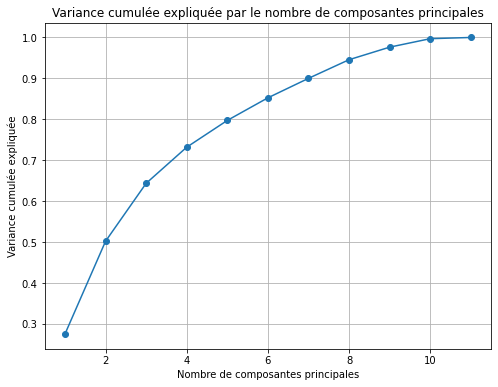

In [47]:
pca_full = PCA()
X_pca = pca_full.fit_transform(X_scaled)

# Calculer la variance expliquée par chaque composante
explained_variance_ratio = pca_full.explained_variance_ratio_

# Calculer la variance cumulée
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Afficher le graphique de la variance cumulée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Variance cumulée expliquée par le nombre de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.show()

5.	Visualisation des résultats :

•	Visualiser la variance expliquée par chaque composante principale


In [49]:
explained_variance_ratio = pca_full.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :", explained_variance_ratio)

Variance expliquée par chaque composante principale : [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]


•	Tracer un graphique en deux dimensions des observations projetées sur les deux premières composantes principales

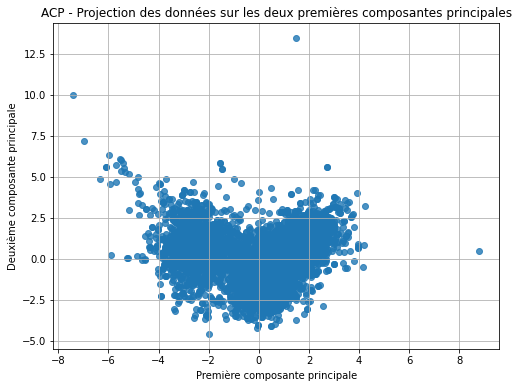

In [50]:
# Tracer un graphique en deux dimensions des observations projetées sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('ACP - Projection des données sur les deux premières composantes principales')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.grid(True)
plt.show()

•	Si les données ont une variable cible (par exemple, qualité du vin), colorer les points en fonction de la qualité du vin.

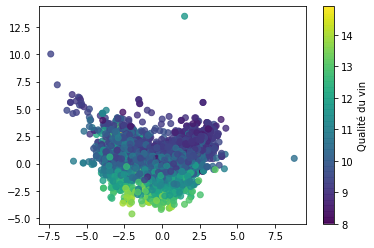

In [55]:
quality = X.iloc[:, -1].values
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=quality, cmap='viridis', alpha=0.8)
plt.colorbar(label='Qualité du vin')